<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

<h1> SCRATCH WORK (template is below)</h1>

In [24]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [25]:
df = df.fillna(df.mean())
df.tail()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1710,2019_VIRGINIA,VIRGINIA,2019,917541.566176,9.102045e+06,767779.864314,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,917541.566176,9.102045e+06,767779.864314,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,917541.566176,9.102045e+06,767779.864314,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,917541.566176,9.102045e+06,767779.864314,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485,242.0,289.0,220.0,267.0
1714,2019_WYOMING,WYOMING,2019,917541.566176,9.102045e+06,767779.864314,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485,246.0,286.0,227.0,265.0


In [34]:
instr_expend = df["INSTRUCTION_EXPENDITURE"].to_numpy()
instr_expend = (instr_expend - instr_expend.mean())/instr_expend.std()

enroll = df["ENROLL"].to_numpy()
enroll = (enroll - enroll.mean())/enroll.std()

reading_8_score =  df["AVG_READING_8_SCORE"].to_numpy()
reading_8_score = (reading_8_score - reading_8_score.mean())/reading_8_score.std()

math_8_score =  df["AVG_MATH_8_SCORE"].to_numpy()
math_8_score = (math_8_score - math_8_score.mean())/math_8_score.std()

Chosen test: **<hit `Enter` to edit>**

Text(4, -12, '      This graph shows that low instructional expenditure correlates with lower 8th grade math scores,\nalthough the variance is quite high. As expenditure increases, scores trend toward the mean.')

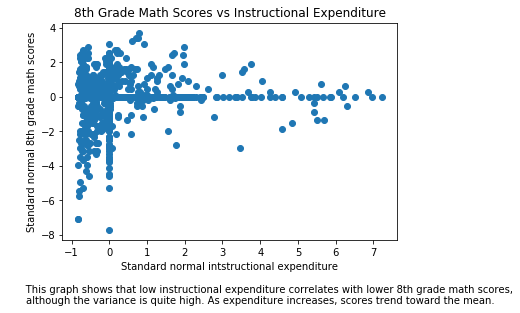

In [66]:
plt.scatter(instr_expend, math_8_score)
plt.xlabel("Standard normal intstructional expenditure")
plt.ylabel("Standard normal 8th grade math scores")
plt.title("8th Grade Math Scores vs Instructional Expenditure")

caption = """      This graph shows that low instructional expenditure correlates with lower 8th grade math scores,
although the variance is quite high. As expenditure increases, scores trend toward the mean."""
plt.text(4, -12, caption, ha='center')

Text(3, -12, 'This graph shows that low enrollment correlates with lower 8th grade math scores,\n               although the variance is quite high. The most enrolled schools also suffer from poor scores.')

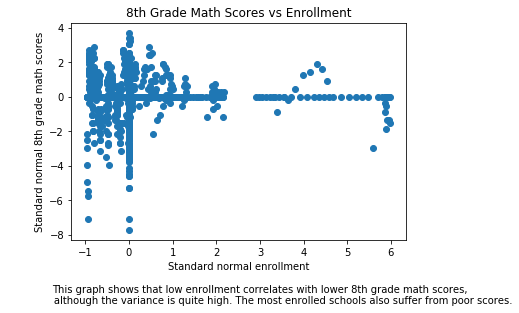

In [76]:
plt.scatter(enroll, math_8_score)
plt.xlabel("Standard normal enrollment")
plt.ylabel("Standard normal 8th grade math scores")
plt.title("8th Grade Math Scores vs Enrollment")

caption = """This graph shows that low enrollment correlates with lower 8th grade math scores,
               although the variance is quite high. The most enrolled schools also suffer from poor scores."""
plt.text(3, -12, caption, ha='center')

In [141]:
"""Want to use regression to predict average 8th grade 
math score from instructional expenditure and enrollment"""

X = np.column_stack((instr_expend, enroll))
y = math_8_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
reg = linear_model.LinearRegression()
# reg.fit(X_train, y_train)
cv = ShuffleSplit(n_splits=5)
print(cross_val_score(reg, X, y, cv=cv).mean())

0.018718172800617848


<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [ ]:
df = pd.read_csv('../data/states_edu.csv')
df = df.fillna(df.mean())

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [ ]:
instr_expend = df["INSTRUCTION_EXPENDITURE"].to_numpy()
instr_expend = (instr_expend - instr_expend.mean())/instr_expend.std()

enroll = df["ENROLL"].to_numpy()
enroll = (enroll - enroll.mean())/enroll.std()

math_8_score =  df["AVG_MATH_8_SCORE"].to_numpy()
math_8_score = (math_8_score - math_8_score.mean())/math_8_score.std()

Final feature list: **Instructional expenditure and enrollment**

Feature selection justification: **I would expect these two features to have a strong predictive ability for quality of education and thus for 8th grade math scores. I do not want to include too many features which could complicate my analysis or introduce spurious correlations or colinearity.**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, '8th Grade Math Scores vs Instructional Expenditure')

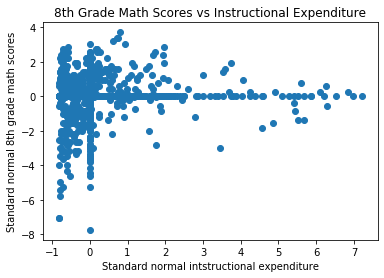

In [145]:
plt.scatter(instr_expend, math_8_score)
plt.xlabel("Standard normal intstructional expenditure")
plt.ylabel("Standard normal 8th grade math scores")
plt.title("8th Grade Math Scores vs Instructional Expenditure")

**This graph shows that low instructional expenditure correlates with lower 8th grade math scores,
although the variance is quite high. As expenditure increases, scores trend toward the mean.**

Visualization 2

Text(0.5, 1.0, '8th Grade Math Scores vs Enrollment')

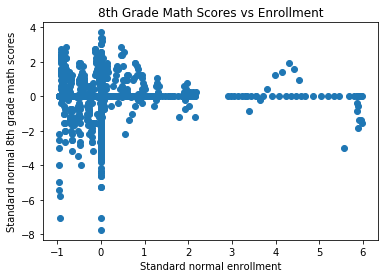

In [146]:
plt.scatter(enroll, math_8_score)
plt.xlabel("Standard normal enrollment")
plt.ylabel("Standard normal 8th grade math scores")
plt.title("8th Grade Math Scores vs Enrollment")

**This graph shows that low enrollment correlates with lower 8th grade math scores,
               although the variance is quite high. The most enrolled schools also suffer from poor scores.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = np.column_stack((instr_expend, enroll))
y = math_8_score

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [ ]:
# import your sklearn class here
from sklearn import linear_model

In [151]:
# create your model here
model = linear_model.LinearRegression()

In [152]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Average 8th Grade Math Scores')

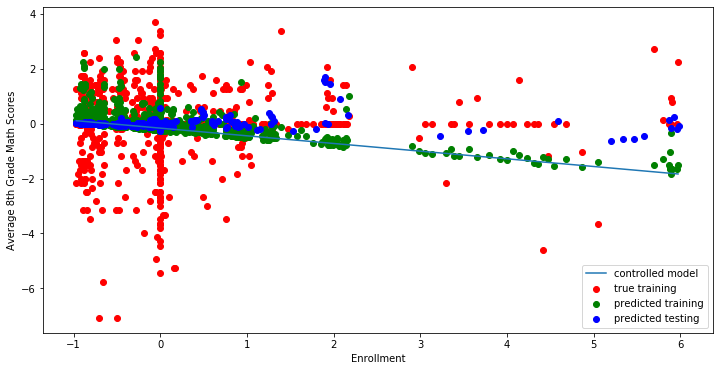

In [160]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


# col_name = ??
# col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[:, 1], y_train, color = "red")
plt.scatter(X_train[:, 1], model.predict(X_train), color = "green")
plt.scatter(X_test[:, 1], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[:, 1].min(),X_train[:, 1].max(),200)
intercept = model.predict([X_train[np.argsort(X_train[:, 1])[0]]]) - X_train[:, 1].min()*model.coef_[1]
plt.plot(new_x, intercept+new_x*model.coef_[1])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel("Enrollment")
plt.ylabel("Average 8th Grade Math Scores")

In [167]:
cv = ShuffleSplit(n_splits=5)
print(cross_val_score(reg, X, y, cv=cv).mean())

0.024888809510874445


<h2> Summary </h2>

**I imported the dataset and filled missing values for each column with the mean for each column. I tested removing entries containing any nans or all nans, but too many entries contained any nans and no entries contained all nans. I then picked two features to predict 8th grade math scores. I chose my features based on my intuition for what would predict math scores well and loose background knowledge. I chose to only use two features to keep my work simple and to avoid potential spurious correlations or colinearity. I standardized and normalized my features and labels because the scale of the values varied heavily, which I believed would hurt my ML model. Following this I graphed my features vs my labels. This gave me a feel for the data, and I saw right away that my ML model was unlikely to perform well. Both features appeared to have very little predictive value for the labels. I also saw that there were a ton of points with the mean score due to a high amount of missing values in the dataset and my data cleaning strategy. Since I only had two features and had no fear of overfitting, I selected a simple linear regression model. By analyzing the graph above and the average cross validation score, it is apparent that my classifier is only slightly better at predicting test scores than a classifier that picks the mean every time. I tried adding bias and polynomial terms to the model, but these made little difference.**